# Chapter 4 분류

## 4.2 결정 트리
#### 결정 트리란? 
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 알고리즘

#### 결정 트리의 구조
- 규칙/결정노드(Decision Nodee) : 규칙조건
- 리프노드(Leaf Node) : 결정된 클래스 값
- 서브트리(Sub Tree): 새로운 규칙 조건마다 규칙 노드 기반의 트리
- 루트노드(Root Node) : 시작점

####  결정 트리의 문제: 과적합
많은 규칙이 있다는 것은 분류 방식이 복잡해진다는 것
트리의 깊이(depth)가 깊어질수록 결정트리는 과적합되기 쉬워 예측 성능이 저하

#### 정보의 균일도에 따른 분류; 그 기준
- 정보이득 = 1 – 엔트로피 지수(데이터 집합의 혼잡도), 값이 큰 기준으로 분할
- 지니계수(!) : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미. 지니계수가 높은 속성을 기준으로 분할

### 결정 트리 모델의 특징
#### 장점
- 쉽고 직관적
- 각 피처의 스케일링과 정규화 같은 전처리 작업의 영향도가 크지 않음
#### 단점
- 규칙을 추가하며 서브트리를 만들어 나갈수록 모델이 복잡해지고, 과적합에 빠지기 쉬움
→ 트리의 크기를 사전에 제한하는 튜닝이 필요

### 결정 트리 파라미터
- min_samples_spli
- min_samples_leaf
- max_features
- max_depth
- max_leaf_nodes

### 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecicionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

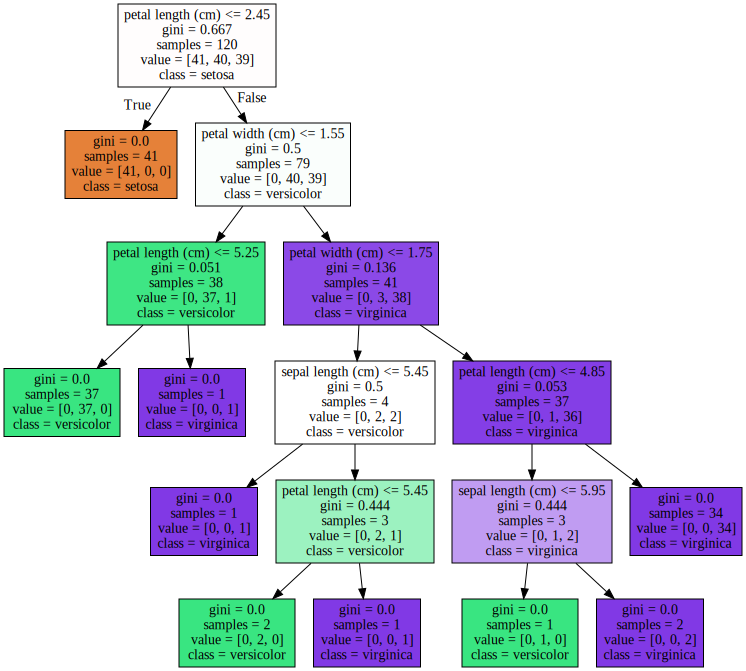

In [3]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm) <= 2.45 와 같이 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건으로 이런 것이 없는 것은 리프노드
- gini: value = [ ] 로 주어진 데이터 분포에서의 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value = [ ] 클래스 값 기반의 데이터 건수 (0: Setosa, 1 : Veericolor, 2: Virginia 를 나타냄)

#### max_depth = 3 제한

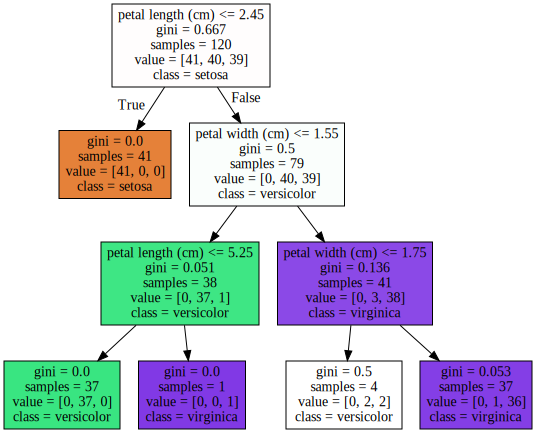

In [4]:
# DecicionTreeClassifier 생성 (max_depth = 3 으로 제한)
dt_clf = DecisionTreeClassifier(max_depth=3 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)


import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### min_samples_split = 4 제한

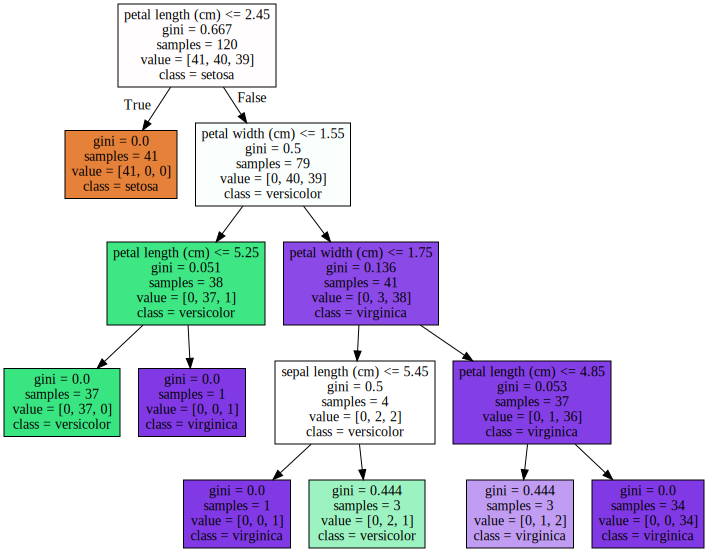

In [5]:
dt_clf = DecisionTreeClassifier(min_samples_split=4 ,random_state=156)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### min_samples_leaf = 4 제한

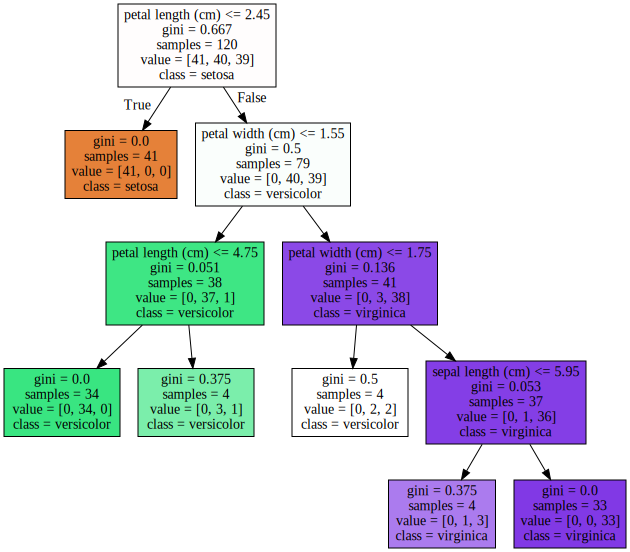

In [6]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=4 ,random_state=156)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### featrue_importances_속성: 피처의 중요도

Feature Importances:
[0.006 0.    0.546 0.448]

sepal length (cm): 0.006
sepal width (cm): 0.000
petal length (cm): 0.546
petal width (cm): 0.448


<AxesSubplot:>

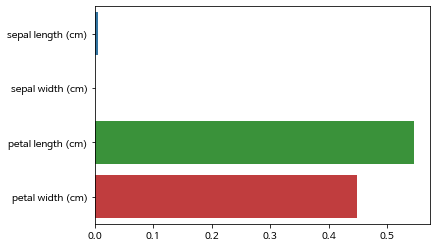

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

-> petal_length의 피처 중요도가 가장 높음

### 결정 트리 과적합(Overfitting)
- make_classification(n_features= ,n_redundant=, n_informative= , n_classes= , n_clusters_per_class= , random_state= ): #개의 피처, #개의 클래스의 분류 샘플 데이터 생성 함수

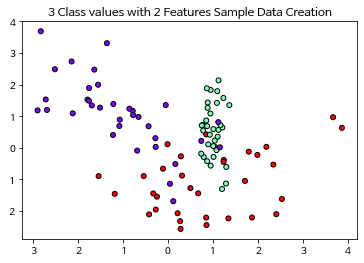

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample Data Creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                                                  n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피쳐로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor = 'k', cmap='rainbow')

In [9]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

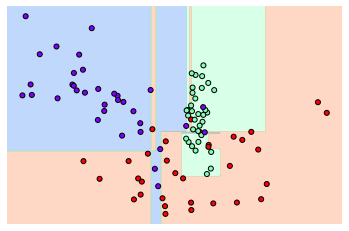

In [10]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

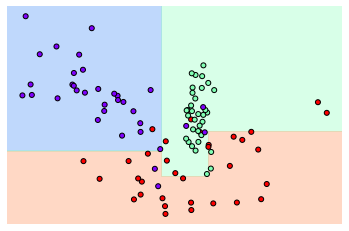

In [11]:
# min_samples_leaf = 6 으로 설정한 Decision Tree의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 4.5 GBM(Gradient Boosting Machine)
### GBM의 개요
오류 데이터에 가중치를 부여하면서 부스팅(여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터의 오류를 개선해 나가면서 학습하는 방법)을 수행하는 대표적인 알고리즘니 *에이다 부스트(AdaBoost)* 와 유사하나, $경사 하강법(Gradient Descent)* 을 이용하여 가중치 업데이트를 이용하는 방법

- 경사하강법: 분류의 실제값을 y, 피처에 기반한 예측함수를 F(x), 오류식을 h(x) = y-F(x)라고 하면 이 오류식을 최소화하는 방향성을 가지고 가중치 값을 업데이트

### GBM 실습

In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [22]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')


# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 620.4초


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))